In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline

Задание:  
построить по многорядному полиномиальному алгоритму метода группового учета аргументов модель предметной области, заданной ретроспективным паттерном. 
В качестве опорной функции использовать функцию: y = a0 + a1xi + a2xj . В качестве обучающей выборки взять первые 20 значений паттерна, в качестве тестовой выборки, оставшиеся 5 паттерновисходной таблицы. Обучающую выборку поделить на две в соотношении: 60%
и 40% (непосредственно обучающая выборка и проверочная выборка для
отбора по МГУА). Провести сравнение значений исходной модели и модели,
построенной по МГУА. Результат сравнения представить в таблице. Построить
график значений исходной модели и модели, построенной по МГУА.
Просчитать среднюю ошибку аппроксимации и сделать вывод о качестве
обученной модели по методы МГУА.

## Подготовка данных

In [2]:
data = {
    'y': [0.904, 0.922, 0.763, 0.923, 0.918, 0.906, 0.905, 0.545, 0.894, 0.9, 
          0.932, 0.74, 0.701, 0.744, 0.921, 0.927, 0.802, 0.747, 0.927, 0.721,
          0.913, 0.918, 0.833, 0.914, 0.923],
    'x1': [75.5, 78.5, 78.4, 77.7, 84.4, 75.9, 76, 67.5, 78.2, 78.1, 
           78.6, 84, 59.2, 90.2, 72.8, 67.7, 82.6, 74.4, 83.3, 83.7, 
           73.8, 79.2, 71.5, 75.3, 79],
    'x2': [25.2, 21.8, 25.7, 17.8, 15.9, 22.4, 20.6, 25.2, 20.7, 17.5, 
           19.7, 18.5, 54.4, 23, 20.2, 25.2, 22.4, 22.7, 18.1, 20.1, 
           17.3, 16.8, 29.9, 20.3, 14.1],
    'x3': [3343, 3001, 3101, 3543, 3237, 3330, 3808, 2415, 3295, 3504, 
           30565, 3007, 2844, 2861, 3259, 3350, 3344, 2704, 3642, 2753, 
           2916, 3551, 3177, 3280, 3160],
    'x4': [77, 78.2, 68, 77.2, 77.2, 77.2, 75.7, 62.6, 78, 78.2, 
           79, 67.6, 69.8, 68.4, 77.9, 78.1, 72.5, 66.6, 76.7, 68.8, 
           76.8, 78.1, 73.9, 78.6, 78.5]
}
df = pd.DataFrame(data)
df

,y,x1,x2,x3,x4
0,0.904,75.5,25.2,3343,77.0
1,0.922,78.5,21.8,3001,78.2
2,0.763,78.4,25.7,3101,68.0
3,0.923,77.7,17.8,3543,77.2
4,0.918,84.4,15.9,3237,77.2
5,0.906,75.9,22.4,3330,77.2
6,0.905,76.0,20.6,3808,75.7
7,0.545,67.5,25.2,2415,62.6
8,0.894,78.2,20.7,3295,78.0
9,0.900,78.1,17.5,3504,78.2


In [3]:
train_data = df.iloc[:20]
test_data = df.iloc[20:]

In [4]:
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

In [5]:
X_train_full = train_data.drop(columns=['y'])
y_train_full = train_data['y']
print(X_train_full.head())
print(y_train_full.head())


     x1    x2    x3    x4
0  75.5  25.2  3343  77.0
1  78.5  21.8  3001  78.2
2  78.4  25.7  3101  68.0
3  77.7  17.8  3543  77.2
4  84.4  15.9  3237  77.2
0    0.904
1    0.922
2    0.763
3    0.923
4    0.918
Name: y, dtype: float64


## Построим модель, используя МГУА

60% данных остаются для непосредственного обучения (обучающая выборка — X_train, y_train)

40% данных выделяются для валидации (проверочная выборка — X_val, y_val). val используется для проверки модели во время обучения, но не участвует в самом обучении

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.4, random_state=42)

MSE (средняя квадратическая ошибка) — это оценка среднего значения квадрата ошибок, различие между предсказанием и фактическим значением.
Вычисляется по формуле: 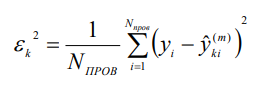

In [7]:
from sklearn.metrics import mean_squared_error
def compute_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

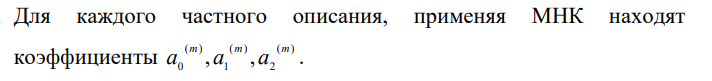

In [8]:
def partial_description(X, y):
    reg = LinearRegression()
    reg.fit(X, y)
    return reg.coef_, reg.intercept_

In [9]:
from itertools import combinations
def mgua(X_train, X_val, y_train, y_val, max_iterations=10):
    best_models = []
    best_mse = float('inf') # бесконечность
    variable_combinations = list(combinations(X_train.columns, 2))
    m = len(variable_combinations)
    
    for i in range(1, max_iterations + 1):
        print(f"Итерация {i}")
        models_for_iteration = []

        for comb in variable_combinations:
            X_combined_train = X_train[list(comb)]
            X_combined_val = X_val[list(comb)]
            
            # Применяем МНК для текущей комбинации переменных на обучающей выборке, чтобы найти лучшие коэффициенты
            coefficients, intercept = partial_description(X_combined_train, y_train)
            # Предсказания на обучающей выборке (для дальнейших итераций)
            y_pred_train = X_combined_train.dot(coefficients) + intercept
            # Предсказания на валидационной выборке (для оценки модели)
            y_pred_val = X_combined_val.dot(coefficients) + intercept

            mse = compute_mse(y_val, y_pred_val)  
            models_for_iteration.append({
                'coefficients': coefficients,
                'intercept': intercept,
                'variables': comb,
                'mse': mse,
                'y_pred_train': y_pred_train,  
                'y_pred_val': y_pred_val  
            })

        # Сортируем модели по MSE (чем меньше MSE, тем лучше)
        models_for_iteration = sorted(models_for_iteration, key=lambda x: x['mse'])
        f1 = int(m * 0.5) # отбираем половину
        best_models_for_iteration = models_for_iteration[:f1]

        # Минимальное значение MSE среди лучших моделей на этой итерации
        min_mse_current = best_models_for_iteration[0]['mse']

        print(f"Лучшие модели на итерации {i}, количество - {f1}:")
        for model in best_models_for_iteration:
            print(f"Пара переменных: {model['variables']}, MSE: {model['mse']}")
        print(f"Лучшее MSE в данной итерации: {min_mse_current}")
        
        if min_mse_current < best_mse:
            best_models.append(best_models_for_iteration[0])
            best_mse = min_mse_current

            # Сужаем пространство поиска (предсказания лучших моделей будут использоваться как новые признаки)
            X_train_new = pd.DataFrame({f"x{i}": model['y_pred_train'] for i, model in enumerate(best_models_for_iteration)})
            X_val_new = pd.DataFrame({f"x{i}": model['y_pred_val'] for i, model in enumerate(best_models_for_iteration)})
            
            f1 *= 0.5  # Уменьшаем количество моделей на следующем ряде селекции
            variable_combinations = list(combinations(X_train_new.columns, 2))  
            m = len(variable_combinations)
            X_train = X_train_new
            X_val = X_val_new
        else:
            print(f"Ошибка не уменьшается на итерации {i}. Остановка")
            break
            
    return best_models


In [10]:
best_models = mgua(X_train, X_val, y_train, y_val)

Итерация 1
Лучшие модели на итерации 1, количество - 3:
Пара переменных: ('x2', 'x4'), MSE: 0.0008278600392654224
Пара переменных: ('x1', 'x4'), MSE: 0.0010612120609289305
Пара переменных: ('x3', 'x4'), MSE: 0.001210217580415098
Лучшее MSE в данной итерации: 0.0008278600392654224
Итерация 2
Лучшие модели на итерации 2, количество - 1:
Пара переменных: ('x0', 'x2'), MSE: 0.0008964463558132182
Лучшее MSE в данной итерации: 0.0008964463558132182
Ошибка не уменьшается на итерации 2. Остановка


In [11]:
best_model = best_models[-1]
coefficients = best_model['coefficients']
intercept = best_model['intercept']
variables = best_model['variables']
print("Коэффициенты лучшей модели:", coefficients)
print("intercept:", intercept)
print("NSE:", best_model["mse"])
print("Параметры:", variables)

Коэффициенты лучшей модели: [-0.0013616   0.02138596]
intercept: -0.712031563627962
NSE: 0.0008278600392654224
Параметры: ('x2', 'x4')


Получается, модель, построенная по многорядному полиномиальному аглоритму МГУА имеет вид: -0.712 - 0.001x2 + 0.0213x4

In [12]:
X_test_combined = X_test[list(variables)]
y_pred_mgua = X_test_combined.dot(coefficients) + intercept
new_df_mgua = pd.DataFrame({'Actual': y_test, "Predicted": y_pred_mgua}) 
print("Сравнение значений:")
new_df_mgua

Сравнение значений:


,Actual,Predicted
20,0.913,0.906855
21,0.918,0.935337
22,0.833,0.827679
23,0.914,0.941265
24,0.923,0.947568


In [13]:
mse_mgua = compute_mse(y_test, y_pred_mgua)
mse_mgua

0.00034271751894955513

Величина MSE для модели МГУА составляет 0.00034, что является довольно низким значением. Это говорит о том, что модель по МГУА имеет высокую точность предсказаний

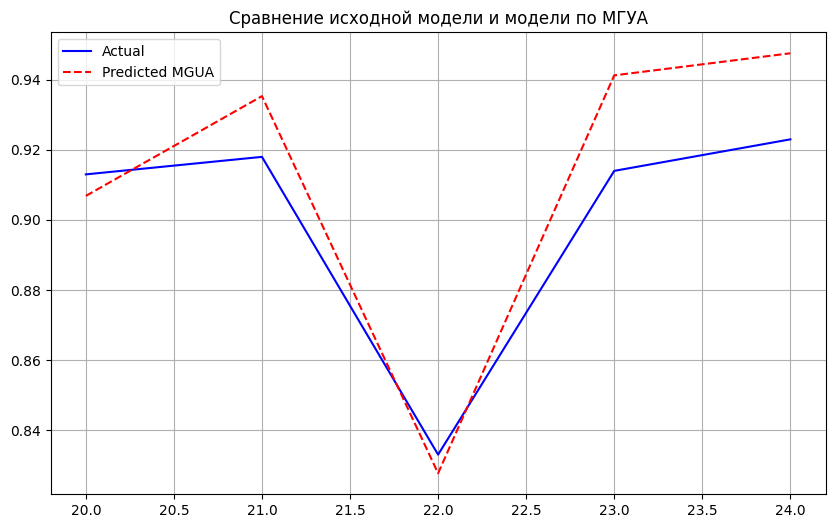

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred_mgua, label='Predicted MGUA', linestyle='--', color='red')
plt.title("Сравнение исходной модели и модели по МГУА")
plt.legend()
plt.grid(True)
plt.show()

Предсказания модели МГУА немного отличаются от реальных значений в точках, но отклонения незначительны